In [36]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import json
from feature_engineering import FeatureEngineering
from data_overview import DataOverview
import seaborn as sns 
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None  # default='warn'

# Initiate classes
do = DataOverview()
fe = FeatureEngineering()
do = DataOverview()

#### The following code  we will take care the data set features one by one
##### Mainly we can separate our dataset columns in to three types:
###### 1) key = user_id_inter_id - The one which we proccessing the data with respect to
###### 2) label - The one which generate label per id 
###### 3) features - User and policy properties
##### In each step we will transform our raw data with respect to our key

###### Reading the data

In [37]:
df = pd.read_csv('./data/lemonade_ds_coding_task_data_(2).csv')


#### Indexing by interacted user_id and id 

In [38]:
df.index = df['user_id'].astype(str) +'_' +df['id'].astype(str)
df.head(3)

id state  postal_code product  \
-9.16005e+18_2.49201e+18  2.492010e+18    NM        87043     ho4   
-8.929e+18_8.86075e+17    8.860750e+17    WI        53715     ho4   
-9.01598e+18_5.52729e+18  5.527290e+18    WI        53211     ho4   

                               user_id  square_ft  high_risk_dog  \
-9.16005e+18_2.49201e+18 -9.160050e+18        NaN              0   
-8.929e+18_8.86075e+17   -8.929000e+18        NaN              0   
-9.01598e+18_5.52729e+18 -9.015980e+18        NaN              0   

                          has_fire_alarm  has_burglar_alarm  \
-9.16005e+18_2.49201e+18            True               True   
-8.929e+18_8.86075e+17              True              False   
-9.01598e+18_5.52729e+18            True              False   

                          portable_electronics  coast fire_housing_proximity  \
-9.16005e+18_2.49201e+18                   0.0    NaN                      5   
-8.929e+18_8.86075e+17                     1.0   30.0                      1   
-9.01598e+18_5.52729e+18                   1.0    1.0                      1   

                          previous_policies  user_age card_type  target  
-9.16005e+18_2.49201e+18                  0      39.0    credit   False  
-8.929e+18_8.86075e+17                    0      19.0     debit   False  
-9.01598e+18_5.52729e+18                  0      20.0     debit    True

### user_id and id 

###### These column will be our source of key of the final feature engneering results.
###### Since we intersted to predict our user policy conversion we will aggregate the raw data with a respect to combination od user_id and id.
###### So we expected the final results to be with row per user_id and id.
###### Lets convert user_id and id to be hour index 

In [39]:
df.index = df['user_id'].astype(str) +'_' +df['id'].astype(str)
df

id state  postal_code product  \
-9.16005e+18_2.49201e+18   2.492010e+18    NM        87043     ho4   
-8.929e+18_8.86075e+17     8.860750e+17    WI        53715     ho4   
-9.01598e+18_5.52729e+18   5.527290e+18    WI        53211     ho4   
-9.06003e+18_6.4534e+18    6.453400e+18    NM        88012     ho4   
-8.80172e+18_-8.83639e+18 -8.836390e+18    AR        72116     ho4   
...                                 ...   ...          ...     ...   
-9.13928e+18_-8.08804e+18 -8.088040e+18    TX        78754     ho4   
-9.02547e+18_-1.99162e+18 -1.991620e+18    TX        75215     ho4   
-9.19132e+18_-7.98882e+18 -7.988820e+18    TX        77087     ho4   
-8.83263e+18_1.74904e+18   1.749040e+18    TX        78704     ho4   
-9.03879e+18_-6.86341e+18 -6.863410e+18    TX        76132     ho4   

                                user_id  square_ft  high_risk_dog  \
-9.16005e+18_2.49201e+18  -9.160050e+18        NaN              0   
-8.929e+18_8.86075e+17    -8.929000e+18        NaN              0   
-9.01598e+18_5.52729e+18  -9.015980e+18        NaN              0   
-9.06003e+18_6.4534e+18   -9.060030e+18        NaN              0   
-8.80172e+18_-8.83639e+18 -8.801720e+18        NaN              0   
...                                 ...        ...            ...   
-9.13928e+18_-8.08804e+18 -9.139280e+18        NaN              0   
-9.02547e+18_-1.99162e+18 -9.025470e+18        NaN              0   
-9.19132e+18_-7.98882e+18 -9.191320e+18        NaN              0   
-8.83263e+18_1.74904e+18  -8.832630e+18        NaN              0   
-9.03879e+18_-6.86341e+18 -9.038790e+18        NaN              0   

                           has_fire_alarm  has_burglar_alarm  \
-9.16005e+18_2.49201e+18             True               True   
-8.929e+18_8.86075e+17               True              False   
-9.01598e+18_5.52729e+18             True              False   
-9.06003e+18_6.4534e+18              True               True   
-8.80172e+18_-8.83639e+18           False              False   
...                                   ...                ...   
-9.13928e+18_-8.08804e+18           False              False   
-9.02547e+18_-1.99162e+18            True               True   
-9.19132e+18_-7.98882e+18           False               True   
-8.83263e+18_1.74904e+18             True              False   
-9.03879e+18_-6.86341e+18            True              False   

                           portable_electronics  coast fire_housing_proximity  \
-9.16005e+18_2.49201e+18                    0.0    NaN                      5   
-8.929e+18_8.86075e+17                      1.0   30.0                      1   
-9.01598e+18_5.52729e+18                    1.0    1.0                      1   
-9.06003e+18_6.4534e+18                     1.0    NaN                      1   
-8.80172e+18_-8.83639e+18                   1.0    NaN                      1   
...                                         ...    ...                    ...   
-9.13928e+18_-8.08804e+18                   0.0   30.0                      1   
-9.02547e+18_-1.99162e+18                   1.0   30.0                      2   
-9.19132e+18_-7.98882e+18                   1.0   20.0                      1   
-8.83263e+18_1.74904e+18                    1.0   30.0                      1   
-9.03879e+18_-6.86341e+18                   1.0   30.0                      1   

                           previous_policies  user_age card_type  target  
-9.16005e+18_2.49201e+18                   0      39.0    credit   False  
-8.929e+18_8.86075e+17                     0      19.0     debit   False  
-9.01598e+18_5.52729e+18                   0      20.0     debit    True  
-9.06003e+18_6.4534e+18                    0      33.0     debit   False  
-8.80172e+18_-8.83639e+18                  0      20.0     debit   False  
...                                      ...       ...       ...     ...  
-9.13928e+18_-8.08804e+18                  1      52.0     debit   False  
-9.02547e+18_-1.99162e+18

### label

###### rename columns to 'label'

In [40]:
df = df.rename(columns = {'target':'label'})
df.head(3)

id state  postal_code product  \
-9.16005e+18_2.49201e+18  2.492010e+18    NM        87043     ho4   
-8.929e+18_8.86075e+17    8.860750e+17    WI        53715     ho4   
-9.01598e+18_5.52729e+18  5.527290e+18    WI        53211     ho4   

                               user_id  square_ft  high_risk_dog  \
-9.16005e+18_2.49201e+18 -9.160050e+18        NaN              0   
-8.929e+18_8.86075e+17   -8.929000e+18        NaN              0   
-9.01598e+18_5.52729e+18 -9.015980e+18        NaN              0   

                          has_fire_alarm  has_burglar_alarm  \
-9.16005e+18_2.49201e+18            True               True   
-8.929e+18_8.86075e+17              True              False   
-9.01598e+18_5.52729e+18            True              False   

                          portable_electronics  coast fire_housing_proximity  \
-9.16005e+18_2.49201e+18                   0.0    NaN                      5   
-8.929e+18_8.86075e+17                     1.0   30.0                      1   
-9.01598e+18_5.52729e+18                   1.0    1.0                      1   

                          previous_policies  user_age card_type  label  
-9.16005e+18_2.49201e+18                  0      39.0    credit  False  
-8.929e+18_8.86075e+17                    0      19.0     debit  False  
-9.01598e+18_5.52729e+18                  0      20.0     debit   True

## Na users 
##### Before we dive in to each featur, lets remove probalematic users - users with many nans

In [41]:
df.isna().sum(axis=1).value_counts()

1    10584
2     1524
0      231
3       50
4        8
dtype: int64

#### There is 8 users with 4 nans - lets drop out these users 

In [42]:
number_of_label_one  = df.label.sum()
df_filtered = df[df.isna().sum(axis=1)<4]

##### Is it change the number of label 1 ? 

In [43]:
df_filtered.label.sum() != number_of_label_one

False

##### But what about removing the 3 nan users ? 

In [44]:
p = df[df.isna().sum(axis=1)==3].label.sum()/sum(df.isna().sum(axis=1)==3)
print(f"The precentage of users with target = 1 within users with 3 na is {p:.2%}! 3 times bigger then propotion in the data\n->>> lets create feature 'number_of_na'")

The precentage of users with target = 1 within users with 3 na is 6.00%! 3 times bigger then propotion in the data
->>> lets create feature 'number_of_na'


In [45]:
df['number_of_na'] = df.isna().sum(axis=1)

### state

###### - IN - Indiana represented only 4 times (It's not that informative), lets convert it to "Illinois". Why no to "Ohio" or "Kentucky" cause the "Bible belt" population is much the same as in "Illinois".

In [46]:
do.value_counts_and_percentage(df =df,column ='state')

count         %
CA   3798  0.306364
TX   3316  0.267484
NY   2193  0.176898
IL    833  0.067194
NJ    421  0.033960
GA    383  0.030895
OH    326  0.026297
NV    212  0.017101
PA    209  0.016859
AZ    172  0.013874
OR    112  0.009034
MI    110  0.008873
MD     88  0.007098
DC     72  0.005808
WI     48  0.003872
NM     26  0.002097
IA     24  0.001936
CT     22  0.001775
RI     18  0.001452
AR     10  0.000807
IN      4  0.000323

#### Lets take a look at the probability to 1 and number of sampels in each state 

In [47]:
df[['state','label']].groupby(['state']).agg(['mean','count'])

label      
           mean count
state                
AR     0.000000    10
AZ     0.011628   172
CA     0.023433  3798
CT     0.000000    22
DC     0.027778    72
GA     0.031332   383
IA     0.000000    24
IL     0.019208   833
IN     0.000000     4
MD     0.056818    88
MI     0.027273   110
NJ     0.026128   421
NM     0.000000    26
NV     0.018868   212
NY     0.024168  2193
OH     0.033742   326
OR     0.026786   112
PA     0.038278   209
RI     0.000000    18
TX     0.018094  3316
WI     0.041667    48

##### Its clear that the probability to 1 in states with low number of sampels tend to be 0
##### If the data has contained all usa states we where join close states in order to make the data more representative (Assumption - users with geographical proximity are behave the same)
##### But because not all the us state are in the data lets group all th probability to 1 states together (Assumption - tate with with probsbility to 1 = 0 are the same )

In [48]:
# Read mapping
path = 
with open(path, 'r') as outfile:
    state_map = json.load(outfile)
state_map

{'NM': 'AR',
 'WI': 'WI',
 'AR': 'AR',
 'RI': 'AR',
 'IA': 'AR',
 'CT': 'AR',
 'IL': 'IL',
 'AZ': 'AZ',
 'CA': 'CA',
 'DC': 'DC',
 'GA': 'GA',
 'MD': 'MD',
 'MI': 'MI',
 'NJ': 'NJ',
 'NV': 'NV',
 'NY': 'NY',
 'OH': 'OH',
 'OR': 'OR',
 'PA': 'PA',
 'TX': 'TX',
 'IN': 'AR  '}

In [86]:
# Map values - IN,NM ETC  not exist any more! we will use the same map dictionery in the production section
df = fe.map_col(map_path = './maps/state.txt', 
                df =df, 
                col_to_map = 'state', new_mapped_col_name = 'state')

do.value_counts_and_percentage(df=df[['state']], column='state')

count         %
CA   3798  0.306463
TX   3316  0.267570
NY   2193  0.176955
IL    833  0.067215
NJ    421  0.033971
GA    383  0.030905
OH    326  0.026305
NV    212  0.017106
PA    209  0.016864
AZ    172  0.013879
OR    112  0.009037
MI    110  0.008876
AR    100  0.008069
MD     88  0.007101
DC     72  0.005810
WI     48  0.003873

# Postal code

#### General view

In [50]:
do.value_counts_and_percentage(df =df,column ='postal_code')

count         %
10016     95  0.007663
10009     76  0.006131
78741     76  0.006131
94103     67  0.005405
94107     66  0.005324
...      ...       ...
8360       1  0.000081
49332      1  0.000081
75961      1  0.000081
45242      1  0.000081
79911      1  0.000081

[2565 rows x 2 columns]

##### Its clearfrom the above  that postal code suffer from high cardinality.
##### Lets see if there is some suspected postal codes
##### Suspected meaning high volume with label 1 proportion

In [51]:
d = df[['postal_code','label']].groupby(['postal_code']).agg(['mean','count'])
df_suspected_postalcodes  = d[(d[('label','mean')]>0.2) & (d[('label','mean')]<1) &(d[('label','count')] > 5)]
df_suspected_postalcodes

label      
                 mean count
postal_code                
75203        0.333333     6
77065        0.285714     7
91302        0.222222     9

##### The above postal code are suspected, lets map all postal codes to one group and these 3 to themselves and use this feature as categorical.


In [52]:
# Map creation
postal_code_map = {}
for i in df.postal_code.unique():
    if i not in df_suspected_postalcodes.index:
        postal_code_map[str(i)] = 'generall_postal_code'
    else:
        postal_code_map[str(i)] = str(i)
        
# Save map 
path = './maps/postal_code_map.txt'
with open(path, 'w') as outfile:
    json.dump(postal_code_map,outfile)
    
# Add groud_postal_code column
df['grouped_postal_code'] = df.postal_code.astype(str).map(postal_code_map)
assert len (df.grouped_postal_code.unique()) == len(set(postal_code_map.values()))
df.grouped_postal_code.unique()

array(['generall_postal_code', '91302', '75203', '77065'], dtype=object)

#### Postal code and household income

######  Another use of postal code is to use it as a key of join of median household income of each postal code. 


In [53]:
# Read houshold_income postal code csv
df_household_income = pd.read_csv('./data/postal_code_houshold_income.csv')
df['median_household_income'] =df.filter(like = 'postal_code').merge(df_household_income, how='left', on='postal_code').set_index(df.index)['median_household_income']

print('Nan within median housholde income\n\n')
display(do.nan_counter(df = df[['median_household_income']]))

df.median_household_income= fe.convert_nans_by_column(df = df, 
                          nan_col = 'median_household_income', 
                          reference_col  = 'card_type',
                          agg_type='median')

print('Nan within median housholde income after using card_type (Assumption : users with different card types tend to add same income)\n\n')
display(do.nan_counter(df = df[['median_household_income']]))


Nan within median housholde income




nan_count  nan_percenatge
median_household_income         41        0.003307

Nan within median housholde income after using card_type (Assumption : users with different card types tend to add same income)




nan_count  nan_percenatge
median_household_income          1        0.000081

######  * There is many other ways to target the postal code high caridanlity issue: group postal codes by: city/county, Geographers coordinates

## product

In [54]:
# Will be encoded at the end

## fire_housing_proximity

In [55]:
do.value_counts_and_percentage(df =df,column ='fire_housing_proximity')

count         %
1    6391  0.515528
2    3574  0.288296
3    1616  0.130354
4     595  0.047995
5     171  0.013794
6      27  0.002178
7       6  0.000484
8B      3  0.000242
7X      3  0.000242
5X      3  0.000242
8       2  0.000161
5Y      2  0.000161
4Y      2  0.000161
4X      1  0.000081
6Y      1  0.000081

##### Types which contains characters are has low frequency ( -- > Not as much information)
##### Lets remove the charecters and by that combine it with the integers ones (Assumption : values with same integers tend to be the same)
##### Now, since the this is as str column lets try to run our future model: once with the encoded columns and once after converting this column to integers 

In [56]:
df.fire_housing_proximity = fe.pull_integers_from_str_column(df=df, col_to_convert='fire_housing_proximity')
do.value_counts_and_percentage(df=df, column='fire_housing_proximity')

count         %
1   6391  0.515528
2   3574  0.288296
3   1616  0.130354
4    598  0.048237
5    176  0.014197
6     28  0.002259
7      9  0.000726
8      5  0.000403

#### square_ft

##### Lets try to reduce the number of nan by calculating the median squar_ft with respect to postal code (Assumption: houses in same neighborhood has similar squer_ft) and then with respect to state and then product (Some correlation in the pandas profiling report)
##### Then if the nan problem still remain we will categorized the data in order to consider the sampels without nan as features

In [57]:
# Postal code
df.square_ft= fe.convert_nans_by_column(df = df, 
                          nan_col = 'square_ft', 
                          reference_col  = 'postal_code',
                          agg_type='median')

display(do.nan_counter(df = df[['square_ft']]))
# State
df.square_ft = fe.convert_nans_by_column(df = df, 
                                         nan_col = 'square_ft', 
                                         reference_col  = 'state',
                                         agg_type='median')

print('------\n\nAfter using postal code and state \n\n')

display(do.nan_counter(df = df[['square_ft']]))
df.square_ft  =   fe.convert_nans_by_column(df = df, 
                                     nan_col = 'square_ft', 
                                     reference_col  = 'product',
                                     agg_type='median')

print('After using postal code and state and product\n\n')
display(do.nan_counter(df = df[['square_ft']] ))


nan_count  nan_percenatge
square_ft      10495        0.846576

------

After using postal code and state 




nan_count  nan_percenatge
square_ft        490        0.039526

After using postal code and state and product




Empty DataFrame
Columns: [nan_count, nan_percenatge]
Index: []

### high_risk_dog

In [58]:
# The columns contain constant value of 1 , so we will drop this column 

In [59]:
df.drop(columns = ['high_risk_dog'], inplace = True)
df.head(2)

id state  postal_code product  \
-9.16005e+18_2.49201e+18  2.492010e+18    AR        87043     ho4   
-8.929e+18_8.86075e+17    8.860750e+17    WI        53715     ho4   

                               user_id  square_ft  has_fire_alarm  \
-9.16005e+18_2.49201e+18 -9.160050e+18     1800.0            True   
-8.929e+18_8.86075e+17   -8.929000e+18     1099.0            True   

                          has_burglar_alarm  portable_electronics  coast  \
-9.16005e+18_2.49201e+18               True                   0.0    NaN   
-8.929e+18_8.86075e+17                False                   1.0   30.0   

                          fire_housing_proximity  previous_policies  user_age  \
-9.16005e+18_2.49201e+18                       5                  0      39.0   
-8.929e+18_8.86075e+17                         1                  0      19.0   

                         card_type  label  number_of_na   grouped_postal_code  \
-9.16005e+18_2.49201e+18    credit  False             2  generall_postal_code   
-8.929e+18_8.86075e+17       debit  False             1  generall_postal_code   

                          median_household_income  
-9.16005e+18_2.49201e+18                  72898.0  
-8.929e+18_8.86075e+17                    30019.0

### has_fire_alarm

In [60]:
# Balanced feature
do.value_counts_and_percentage(df=df, column='has_fire_alarm')

count         %
True    9395  0.757845
False   3002  0.242155

#### has_burglar_alarm

In [61]:
# Balanced feature
do.value_counts_and_percentage(df=df, column='has_burglar_alarm')

count         %
False  10721  0.864806
True    1676  0.135194

#### portable_electronics 

##### Lets try to reduce the number of nan by calculating the median portable_electronics with respect to postal code (Assumption: houses in same neighborhood has similar| portable_electronics) and then with respect to state and then product (Some correlation in the pandas profiling report)

In [62]:
df.portable_electronics =  fe.convert_nans_by_column(df = df, 
                              nan_col = 'portable_electronics', 
                              reference_col  = 'postal_code',
                              agg_type='mean',
                              threshold=0.5)

print('------\n\nAfter using postal code and state \n\n')
display(do.nan_counter(df = df[['portable_electronics']]))

df.portable_electronics =  fe.convert_nans_by_column(df = df, 
                              nan_col = 'portable_electronics', 
                              reference_col  = 'product',
                              agg_type='mean',
                              threshold=0.5)

print('------\n\nAfter using postal code and product \n\n')
display(do.nan_counter(df = df[['portable_electronics']]))

df.portable_electronics = df.portable_electronics.astype(bool)


------

After using postal code and state 




nan_count  nan_percenatge
portable_electronics         20        0.001613

------

After using postal code and product 




Empty DataFrame
Columns: [nan_count, nan_percenatge]
Index: []

## User_age

##### Before tackeling the nan issue lets convert the column to integer and convert non integer value to na
##### First let's try to complete the missing with the mean age in the same neighborhood (postal code)
##### Sconde Since there is some correlarion between age and card_type   

In [63]:
# Convert True to nan
df.user_age[df.user_age == True] = None

#Convert str to interger
df.user_age[~df.user_age.isna()] = df.user_age[~df.user_age.isna()].astype(int)

In [64]:
# Fill na with respect to postal_code
df.user_age= fe.convert_nans_by_column(df = df, 
                             nan_col = 'user_age', 
                             reference_col  = 'postal_code',
                             agg_type='mean' )

print('After using postal code \n\n')
display(do.nan_counter(df = df[['user_age']]))

df.user_age = fe.convert_nans_by_column(df = df, 
                              nan_col = 'user_age', 
                              reference_col  = 'card_type',
                              agg_type='mean')

print('\n\nAfter using postal code and card_type\n\n')

do.nan_counter(df = df[['user_age']])

After using postal code 




nan_count  nan_percenatge
user_age          5        0.000403



After using postal code and card_type




Empty DataFrame
Columns: [nan_count, nan_percenatge]
Index: []

## previous_policies

In [65]:
# insert as it is 
do.value_counts_and_percentage(df=df, column='previous_policies')

count         %
0   9898  0.798419
1   2152  0.173590
2    275  0.022183
3     48  0.003872
4     19  0.001533
5      3  0.000242
7      1  0.000081
6      1  0.000081

##  card_type

In [66]:
do.nan_counter(df = df[['card_type']])

nan_count  nan_percenatge
card_type         52        0.004195

##### Lets try to reduce the number of nan by calculating the card_type with respect toage (Assumption: age is correlated with cars type)

In [67]:
df.card_type = fe.fill_nans_by_highest_reference_frequency(df=df,
                                                      col_to_fill = 'card_type', 
                                                      refernece_col = 'user_age')
print('------\n\nAfter using user_aget \n\n')
display(do.nan_counter(df = df[['card_type']]))

------

After using user_aget 




nan_count  nan_percenatge
card_type          1        0.000081

# Coast

In [68]:
do.nan_counter(df = df[['coast']])

nan_count  nan_percenatge
coast       1155        0.093168

##### Lets try to reduce the number of nan by calculating the coast with respect postal_code (Assumption: houses in same neighborhood has similar distance from coast)

In [69]:
df.coast =  fe.fill_nans_by_highest_reference_frequency(df=df,
                                                        col_to_fill = 'coast', 
                                                        refernece_col = 'postal_code')
print('------\n\nAfter using postal code \n\n')

do.nan_counter(df = df[['coast']])

------

After using postal code 




nan_count  nan_percenatge
coast       1129         0.09107

###### After looking into the data its looks like that users that fare away from costs have NaN for example users from New-Maxico. That bring us to assumed that nan equal to the highest coast number as possible. 
###### No beacuse this feature values as no meaning expect the order we will convert nan to 12 and use this feature as ordinal feature

In [70]:
dct = {str(k):v for v,k in enumerate(sorted(df.coast.unique(),))}
dct['nan'] = 12
df.coast = df.coast.astype(str).map(dct).astype(int)
df.coast.unique()

array([12, 11,  2,  1,  7,  3,  8,  9,  6,  4, 10,  5])

## remove duplicated columns and rows (if exist)

In [76]:
df_concatenated = fe.remove_duplicated_columns(df = df)
df[df.duplicated()].index

The following duplicated columns droped []


Index([], dtype='object')

## cols to remove  


In [77]:
columns_to_remove = ['id','user_id','postal_code']
df = df.drop(columns = columns_to_remove)

## scond Pandas profiling 

In [78]:
prof = pandas_profiling.ProfileReport(df=df )
prof.to_file('./Pandas-profiling/after_feature_engineering.html')
prof

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Save for next section

In [84]:
df.to_csv('./data/df_before_encoding.csv')

df_encoded = pd.get_dummies(df)
df_encoded = ('./data/df_encoded.csv')

### Some Grafical Oveview

/Users/razshmuely/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


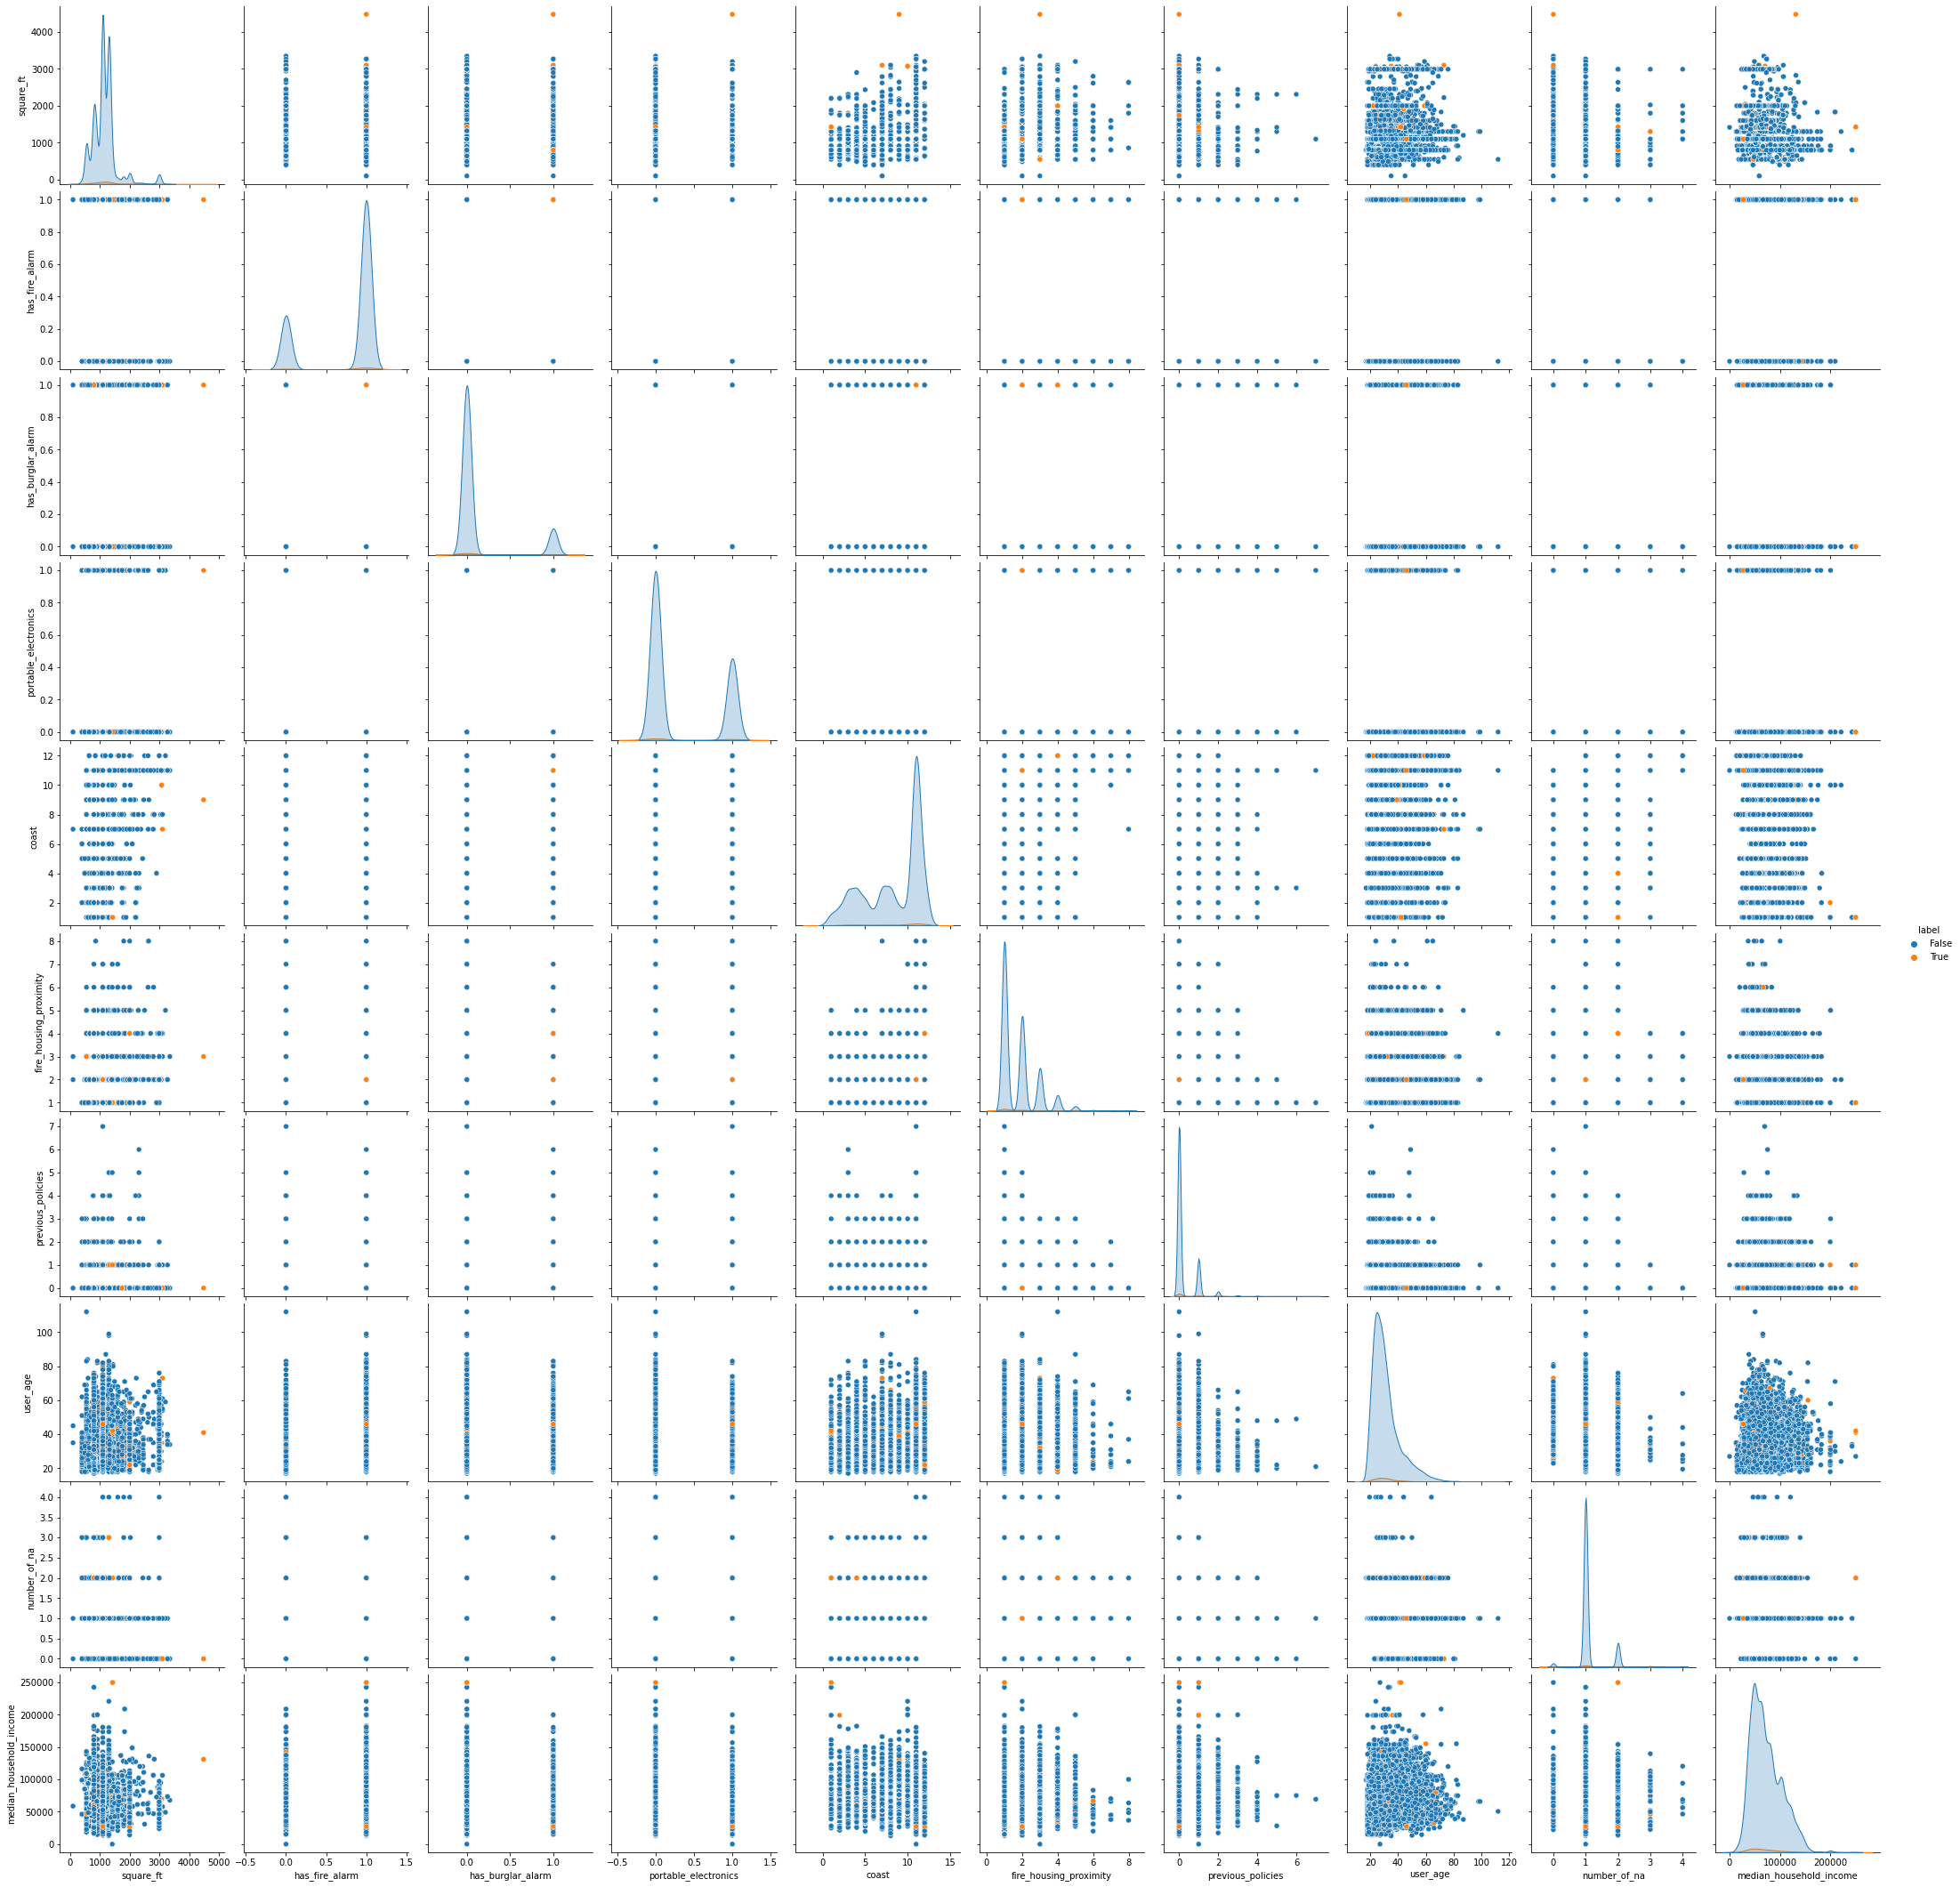

In [81]:
sns.pairplot(df, hue='label', size=3)
plt.show()